In [871]:
# Variaveis iniciais

## dimensoes grade
Nl = 550
Nc = 350

## dimensoes obstaculo
nl = 60
nc = 70
d = 115
## velocidade na direção x positiva
V0 = 1

# indice de interação
h = 1




Primeiramente é feita a declaração de algumas variaveis importantes do problema.

In [872]:
import matplotlib.pyplot as plt
import numpy as np

In [873]:
#Criando as matrizes do Problema
## GRADE

array_ones = [1 for i in range(Nl*Nc)]

matriz_ones = np.reshape(array_ones,(Nl,Nc))


Declaração das matrizes que serão feitos as malhas.

In [874]:
#Contorno da grade

def Contorno(phi,ksi):
    phi[0][:] = 0
    ksi[0][:] = 0
    phi[:,0] = phi[:,1]
    ksi[:,0] = ksi[:,1]
    phi[Nl-1,:] = phi[Nl-2,:]
    phi[:,Nc-1] = phi[:,Nc-2]
    ksi[:,Nc-1] = ksi[:,Nc-2] 
    ksi[Nl-1,:] = ksi[Nl-2,:]

Condições de contorno do problema, somente das malhas primeiramente.

In [875]:
# Matriz KSI

ksi = matriz_ones * 0

# PHI

phi = matriz_ones


In [876]:
# INICIALIZANDO PHI

def inicializa_phi(phi):    
    new_phi = matriz_ones
    for i in range(Nl-1):
        for j in range(Nc-1):
            new_phi[i][j] = i
    Contorno(new_phi,ksi)
    return new_phi

Iniciando as duas matrizes que serão utilizadas, $\phi_{i,j}$ e $\psi_{i,j}$

In [877]:
#Calcula PHI

def calcula_new_phi(phi,ksi):
    new_phi = phi
    old_phi = phi
    Contorno(phi,ksi)
    #for i in range(1,Nl-1):
     #   for j in range(1,Nc-1):
      #      new_phi[i][j] = 0.25*(phi[i+1][j]+phi[i+1][j]+phi[i][j+1]+phi[i][j-1] - ksi[i][j])
    new_phi = 0.25*(np.roll(phi,-1,axis = 0) +np.roll(phi,1,axis = 0) + np.roll(phi,-1,axis = 1) + np.roll(phi,1,axis = 1) - ksi)
    return new_phi,old_phi

In [878]:
#Calcula KSI
def calcula_new_KSI(phi,ksi):
    new_ksi = ksi
    Qsi1 = ksi
    Qsi2 = ksi
    Qsi3 = ksi
    
    #utilizando loop for
    #for i in range(1,Nl-1):
     #   for j in range(1,Nc-1):
      #      new_ksi[i][j] = 0.25 *( ksi[i+1][j] + ksi[i-1][j] + ksi[i][j+1] + ksi[i][j-1] - R/4*(((phi[i][j+1] - phi[i][j-1])*(ksi[i+1][j]-ksi[i-1][j]) ) - ((phi[i+1][j] - phi[i-1][j])*(ksi[i][j+1]-ksi[i][j-1]))))
    
    
    #Utilizando np.roll()
    Qsi1 = (np.roll(ksi,-1,axis = 0) + np.roll(ksi,1,axis = 0) + np.roll(ksi,-1,axis = 1) + np.roll(ksi,1,axis = 1))
    Qsi2 = (np.roll(phi,-1,axis = 1) - np.roll(phi,1,axis = 1))* (np.roll(ksi,1,axis = 0) - np.roll(ksi,-1,axis = 0))
    Qsi3 = (np.roll(phi,1,axis = 0) - np.roll(phi,-1,axis = 0))* (np.roll(ksi,1,axis = 1) - np.roll(ksi,-1,axis = 1))
    new_phi = 0.25*(Qsi1 -  R/4 * (Qsi2-Qsi3))
    return new_ksi

Funções para calcular as duas matrizes de acordo com as iterações necessárias para atingir a precisão da simulação.

In [879]:
# Função para verificar convergencia 
def Convengencia(phi_novo,phi_old):
    w = 0.5
    #erro = 0.1
    aux = 0
    aux = np.amax(np.absolute(phi_novo) - np.absolute(phi_old))
    
    #for i in range(Nl):
     #   for j in range(Nc):
      #      if((1-w)*phi_novo[i][j] + w*phi_old[i][j] < erro):
       #         aux += 1
    return aux

In [880]:
def inclui_obstaculos(phi):
        new_phi_obstaculo = phi
        for i in range(nl):
            for j in range(d,d+nc):
                new_phi_obstaculo[i][j] = 0
        
        new_phi_obstaculo[i][d-1] = 2*phi[i][d-2]    
        new_phi_obstaculo[nl][j] = 2*phi[nl][j+1]
        new_phi_obstaculo[i][d+nc] = 2*phi[i][d+nc]
        return new_phi_obstaculo

In [881]:
def plot_resultado(phi):
    '''np.rot90(phi,0,axes=(1,0))'''
    #phi2 = np.rot90(  phi,0,axes = (1,0) )
    #phi = np.concatenate((phi,phi2),axis = 0)
    plt.pcolor(phi)
    
    plt.show()

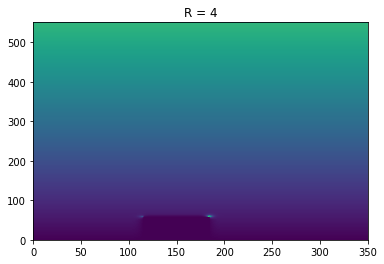

In [882]:
# numero de Reynalds
R = 4
new_phi = inicializa_phi(phi)
aux = 0
a=0
#auxiliar para verificar convergencia
erro = 0.002
while(a <55):
    
    new_phi = inclui_obstaculos(new_phi)
    ksi = calcula_new_KSI(new_phi,ksi)
    new_phi,old_phi = calcula_new_phi(new_phi,ksi)
    
    aux = Convengencia(new_phi,old_phi)
    a+= 1 
   
plt.title("R = 4")
plot_resultado(new_phi)

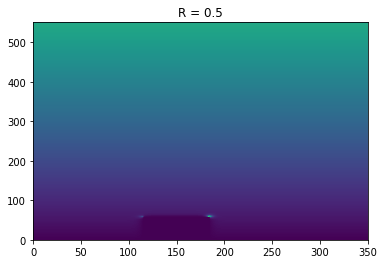

In [883]:
R = 0.5
new_phi = inicializa_phi(phi)
aux = 0
a=0
#auxiliar para verificar convergencia
erro = 0.002
while(a <58):
    
    new_phi = inclui_obstaculos(new_phi)
    ksi = calcula_new_KSI(new_phi,ksi)
    new_phi,old_phi = calcula_new_phi(new_phi,ksi)
    
    aux = Convengencia(new_phi,old_phi)
    a+= 1 
    
plt.title("R = 0.5")
plot_resultado(new_phi)

O campo representa o movimento de um fluido,com uma velocidade inicial Vo = 1m/s,movendo-se laminarmente . Com um obstáculo no centro da malha, os campos retratam o movimento e a proporsão da velocidade do fluido.